<a href="https://colab.research.google.com/github/Sgodilla/Senior_Thesis_Zeroshot_Models/blob/main/Senior_Thesis_Final_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Access to Dataset

To access the dataset, please copy the following folder to your Google Drive and update the EMAIL_PATH variable to where you saved the folder.

### Enron Email Dataset:
https://drive.google.com/drive/folders/1HG8uV59m9A8n0m7TPnsce-IG5VCLQBWY?usp=sharing

In [1]:
# Read files from google drive
from google.colab import drive
drive.mount('/content/drive')

EMAIL_PATH = '/content/drive/My Drive/Gmail Extension Senior Project/enron_with_categories'

Mounted at /content/drive


In [29]:
# Array of classes (can have 10 at max)
topics = [
    "regulations and regulators (includes price caps)",
    "internal projects -- progress and strategy",
    "company image -- current",
    "company image -- changing / influencing",
    "political influence / contributions / contacts",
    "california energy crisis / california politics",
    "internal company policy",
    "internal company operations",
    "alliances / partnerships",
    "legal advice",
    "talking points",
    "meeting minutes",
    "trip reports",
]

# print(topics[0])
print(len(topics))

13


In [3]:
# Read categories file
def get_email_thread_topics(email_thread):
  with open(email_thread) as f:
    # Print all lines
    lines = f.readlines()
    # print(lines)

    # Print only the lines starting with number 3
    email_thread_topics = []
    for line in lines:
      category = line.split(',')
      if category[0] == "3":
        # print(category)
        # Second number in category array is topic index
        email_thread_topics.append(topics[int(category[1]) - 1])

    # Create tuple of file and topics
    email_thread = (f.name, email_thread_topics)
    # print(email_thread)
    return email_thread_topics

# print(get_email_thread_topics('/content/drive/My Drive/Gmail Extension Senior Project/enron_with_categories/1/6178.cats'))

In [4]:
import re

def extract_email_content(file_path):
    with open(file_path, 'r') as file:
        data = file.read()

    # Regular expression to split the full text into separate emails based on "Message-ID"
    emails = re.split(r'\n(?=Message-ID: <)', data)

    filtered_emails = []

    for email in emails:
        # Extracting the subject
        subject_match = re.search(r'Subject: (.+)', email)
        if subject_match:
            subject = subject_match.group(1)
        else:
            subject = "No Subject Found"

        # Finding the start of the email content
        content_start = email.find('\n\n')  # Assumes the actual content starts after two newlines following the header
        if content_start != -1:
            content = email[content_start:].strip()

            # Remove any re-forwarded or replied to headers and metadata within the content
            content = re.sub(r'(\n-+\s*Original Message\s*-+\n|\n>.*|\nOn.*wrote:).*', '', content, flags=re.S)
            content = re.sub(r'\n.*@.*\son\s.*\n', '', content, flags=re.S)  # For removing any timestamped sender lines
            content = re.sub(r'\nFrom:.*\n?', '', content)  # Remove any nested 'From' lines
            content = re.sub(r'\nSent:.*\n?', '', content)  # Remove 'Sent' timestamps
            content = re.sub(r'\nTo:.*\n?', '', content)  # Remove 'To' lines
            content = re.sub(r'\nCc:.*\n?', '', content)  # Remove 'Cc' lines
            content = re.sub(r'\nSubject:.*\n?', '', content)  # Remove nested 'Subject' lines
            content = re.sub(r'\n.*@.*wrote:\n', '', content)  # Remove inline reply headers

            # Adding the final cleaned email to the list
            filtered_emails.append(f"Subject: {subject}\n{content}\n---\n")

    return '\n'.join(filtered_emails)

# print(extract_email_content('/content/drive/My Drive/Gmail Extension Senior Project/enron_with_categories/1/6178.txt'))

In [5]:
# Read all files from directory
import os

In [6]:
email_threads_dir = EMAIL_PATH + '/1/'

# Loop through all files in email threads directory
email_threads = []
for filename in os.listdir(email_threads_dir):
  if filename.endswith('.txt'): # Check if the file is a text file
    basename, _ = os.path.splitext(filename)
    email_content_path = os.path.join(email_threads_dir, basename + '.txt')
    email_topics_path = os.path.join(email_threads_dir, basename + '.cats')
    email_threads.append((email_content_path, email_topics_path))

# Print first 10 email thread tuples and number of email threads
print(email_threads[:10])
print(len(email_threads))

[('/content/drive/My Drive/Gmail Extension Senior Project/enron_with_categories/1/226952.txt', '/content/drive/My Drive/Gmail Extension Senior Project/enron_with_categories/1/226952.cats'), ('/content/drive/My Drive/Gmail Extension Senior Project/enron_with_categories/1/173928.txt', '/content/drive/My Drive/Gmail Extension Senior Project/enron_with_categories/1/173928.cats'), ('/content/drive/My Drive/Gmail Extension Senior Project/enron_with_categories/1/55205.txt', '/content/drive/My Drive/Gmail Extension Senior Project/enron_with_categories/1/55205.cats'), ('/content/drive/My Drive/Gmail Extension Senior Project/enron_with_categories/1/116661.txt', '/content/drive/My Drive/Gmail Extension Senior Project/enron_with_categories/1/116661.cats'), ('/content/drive/My Drive/Gmail Extension Senior Project/enron_with_categories/1/173978.txt', '/content/drive/My Drive/Gmail Extension Senior Project/enron_with_categories/1/173978.cats'), ('/content/drive/My Drive/Gmail Extension Senior Project

In [7]:
# Get email topics
all_email_topics = []
for email_thread in email_threads:
  email_topics = get_email_thread_topics(email_thread[1])
  all_email_topics.extend(email_topics)

# Print first 10 email topics
print(all_email_topics[:10])

['internal company operations', 'regulations and regulators (includes price caps)', 'alliances / partnerships', 'california energy crisis / california politics', 'internal projects -- progress and strategy', 'california energy crisis / california politics', 'internal company operations', 'internal company operations', 'internal company operations', 'internal projects -- progress and strategy']


In [8]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

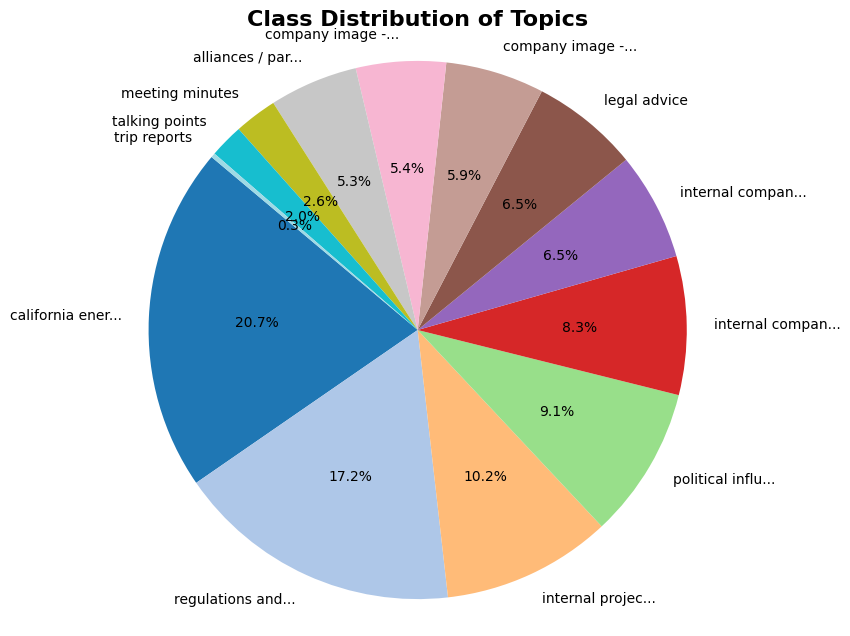

In [9]:
# Assuming all_email_topics is defined
# Count the occurrences of each topic
topic_counts = Counter(all_email_topics)

# Sort topics by frequency
sorted_topics = sorted(topic_counts.items(), key=lambda x: x[1], reverse=True)
sorted_labels = [item[0][:15] + '...' if len(item[0]) > 15 else item[0] for item in sorted_topics]
sorted_counts = [item[1] for item in sorted_topics]

# Generate a list of colors, one for each topic
# colors = plt.cm.viridis(np.linspace(0.90, 0.15, len(sorted_labels)))
colors = plt.get_cmap('tab20')(np.linspace(0, 1, len(sorted_labels)))

# Plot class distribution as a pie chart
plt.figure(figsize=(10, 8))
plt.pie(sorted_counts, labels=sorted_labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution of Topics', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.subplots_adjust(top=0.85)  # Adjust the top margin to give more space for the title
plt.show()

In [10]:
topics_to_skip = set([
    "talking points",
    "meeting minutes",
    "trip reports",
])
all_email_contents = []
all_email_topics = []
for email_thread in email_threads:
  email_topics = get_email_thread_topics(email_thread[1])
  if ((email_topics != []) and (not set(email_topics).intersection(topics_to_skip))):
    email_content = extract_email_content(email_thread[0])
    all_email_contents.append(email_content)
    all_email_topics.append(email_topics[0])


# print(all_email_contents[0])
print(all_email_topics[:10])
print(len(all_email_topics))

['internal company operations', 'regulations and regulators (includes price caps)', 'alliances / partnerships', 'california energy crisis / california politics', 'internal projects -- progress and strategy', 'california energy crisis / california politics', 'internal company operations', 'internal company operations', 'internal company operations', 'internal projects -- progress and strategy']
749


In [11]:
!pip install transformers datasets
from transformers import pipeline
import torch
import random

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 38.2 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [12]:
# Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

Using device: cuda


In [13]:
from torch.utils.data import Dataset

class EmailDataset(Dataset):
    def __init__(self, emails, labels, transform=None):
        self.emails = emails
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.emails)

    def __getitem__(self, idx):
        email = self.emails[idx]
        label = self.labels[idx]

        if self.transform:
            email = self.transform(email)

        return email, label

In [14]:
email_dataset = EmailDataset(all_email_contents, all_email_topics, transform=None)
print(len(email_dataset))

749


In [15]:
rand_example = random.randint(0, len(all_email_contents) - 1)
text = email_dataset.emails[rand_example]
label = email_dataset.labels[rand_example]

print(label)
print()
print(text)

alliances / partnerships

Subject: Fenosa and Enron to Invest $550 Million in Dominican Republic
----- Forwarded by Steven J Kean/NA/Enron on 10/10/2000 02:53 PM -----  12:40 PM- - 12 40 PM EDT 10-10-00
---



In [16]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F
from torch import Tensor

# Load model from HuggingFace Hub
deberta_zeroshot_classifier = pipeline("zero-shot-classification", model="MoritzLaurer/deberta-v3-large-zeroshot-v2.0", device=0 if device == "cuda" else -1)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/870M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.26k [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/8.66M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/970 [00:00<?, ?B/s]

In [17]:
# Calculate score for random example
deberta_output_single = deberta_zeroshot_classifier(text, topics[:10], multi_label=False)

In [19]:
print(deberta_output_single['scores'])

[0.3158628046512604, 0.20729662477970123, 0.18639445304870605, 0.07535874843597412, 0.045800093561410904, 0.04482385516166687, 0.04387872293591499, 0.035865385085344315, 0.024484235793352127, 0.020235057920217514]


In [20]:
# Execute classification of emails
deberta_output_all = deberta_zeroshot_classifier(email_dataset.emails, topics[:10], multi_label=False, batch_size=128)

In [50]:
deberta_num_correct = 0
all_scores = []

for i in range(len(deberta_output_all)):
  email_topics = email_dataset.labels[i]
  deberta_chosen_topic = deberta_output_all[i]['labels'][0]

  predicted_topics = deberta_output_all[i]['labels']
  scores = deberta_output_all[i]['scores']

  #Combine docs & scores
  score_dict = {label: score for label, score in zip(predicted_topics, scores)}

  # Reorder the scores according to the predefined labels list and convert to array
  ordered_scores = np.array([score_dict[topic] for topic in topics[:10]])
  all_scores.append(ordered_scores)

  if deberta_chosen_topic in email_topics:
    deberta_num_correct += 1

debrta_accuracy = deberta_num_correct / len(deberta_output_all)

print("DeBERTa accuracy: " + str(debrta_accuracy))

DeBERTa accuracy: 0.32309746328437916


In [ ]:
print(all_scores)

In [52]:
# Find indices of the emails/scores with greatest confidence
def find_top_x_highest_max_scores(all_scores, x):
    # List to store top x max scores and their indices
    top_x = []

    # Iterate over the list of all_scores
    for index, score_list in enumerate(all_scores):
        # Find the maximum score in the current score list
        current_max_score = max(score_list)

        # Add the current max score and its index to the list
        top_x.append((current_max_score, index))
        # Sort the list by score in descending order and keep only the top x
        top_x = sorted(top_x, reverse=True, key=lambda x: x[0])[:x]

    # Return only the indices of the top x scores
    return [idx for score, idx in top_x]

# Find indices of the emails/scores with lowest confidence
def find_top_x_smallest_max_scores(all_scores, x):
    # List to store the top x smallest max scores and their indices
    top_x_smallest = []

    # Iterate over the list of all_scores
    for index, score_list in enumerate(all_scores):
        # Find the maximum score in the current score list
        current_max_score = max(score_list)

        # Add the current max score and its index to the list
        top_x_smallest.append((current_max_score, index))
        # Sort the list by score in ascending order and keep only the top x
        top_x_smallest = sorted(top_x_smallest, key=lambda x: x[0])[:x]

    # Return only the indices of the top x smallest scores
    return [idx for score, idx in top_x_smallest]

In [53]:
# Top 5 highest confidence scores
top_5_confidence = find_top_x_highest_max_scores(all_scores, 5)
print(top_5_confidence)

[227, 627, 188, 114, 1]


In [54]:
# Top 5 lowest confidence scores
bottom_5_confidence = find_top_x_smallest_max_scores(all_scores, 5)
print(bottom_5_confidence)

[360, 19, 640, 698, 718]


In [55]:
# Print most confident email
most_confident_email = email_dataset.emails[top_5_confidence[0]]
most_confident_label = email_dataset.labels[top_5_confidence[0]]
most_confident_score = results[top_5_confidence[0]]

print(most_confident_score)
print()
print(most_confident_label)
print(most_confident_email)

[('political influence / contributions / contacts', 0.9854749441146851), ('internal company operations', 0.006044048350304365), ('internal company policy', 0.0029480038210749626), ('alliances / partnerships', 0.0016891459235921502), ('internal projects -- progress and strategy', 0.001235387520864606), ('company image -- changing / influencing', 0.000637080695014447), ('regulations and regulators (includes price caps)', 0.0005886289873160422), ('company image -- current', 0.0005662681069225073), ('legal advice', 0.0005178119754418731), ('california energy crisis / california politics', 0.00029878682107664645)]

political influence / contributions / contacts
Subject: CONFIDENTIAL - Tennessee political contributions
Barbara, short of me coming up with the money, it will be next to impossible computer.
---



In [56]:
# Print least confident email
least_confident_email = email_dataset.emails[bottom_5_confidence[1]]
least_confident_label = email_dataset.labels[bottom_5_confidence[1]]
least_confident_score = results[bottom_5_confidence[1]]

print(least_confident_score)
print()
print(least_confident_label)
print(least_confident_email)

[('company image -- changing / influencing', 0.17350910604000092), ('political influence / contributions / contacts', 0.17092008888721466), ('regulations and regulators (includes price caps)', 0.16928595304489136), ('california energy crisis / california politics', 0.1074196845293045), ('alliances / partnerships', 0.10145220160484314), ('internal company operations', 0.08755511790513992), ('internal company policy', 0.0766320750117302), ('company image -- current', 0.05653858184814453), ('internal projects -- progress and strategy', 0.03539269417524338), ('legal advice', 0.02129455842077732)]

california energy crisis / california politics
Subject: NYTimes.com Article: The Real Wolf
This article from NYTimes.comCopyright 2001 The New York Times Company
---



# LIME Explanations for Most Confident and Least Confident

In [77]:
# Array of classes (can have 10 at max)
topics = [
    "regulations and regulators (includes price caps)",
    "internal projects -- progress and strategy",
    "company image -- current",
    "company image -- changing / influencing",
    "political influence / contributions / contacts",
    "california energy crisis / california politics",
    "internal company policy",
    "internal company operations",
    "alliances / partnerships",
    "legal advice",
    "talking points",
    "meeting minutes",
    "trip reports",
]

In [83]:
def predict_proba(texts):
    if isinstance(texts, str):
        texts = [texts]  # Ensure input is a list of texts

    # Get predictions for each text
    results = deberta_zeroshot_classifier(texts, candidate_labels=topics[:10])

    # Create an array to hold the ordered scores
    ordered_probabilities = []

    for result in results:

        # Map labels to scores
        score_dict = {label: score for label, score in zip(result['labels'], result['scores'])}

        # Reorder the scores according to the predefined labels list and convert to array
        ordered_scores = np.array([score_dict[topic] for topic in topics[:10]])

        ordered_probabilities.append(ordered_scores)

    # Convert list of arrays into a 2D array
    return np.array(ordered_probabilities)


In [84]:
# Test predict_proba function with most confident email
print(predict_proba([email_dataset.emails[top_5_confidence[0]]]))
print(all_scores[top_5_confidence[0]])

[[5.88628754e-04 1.23538543e-03 5.66267758e-04 6.37082267e-04
  9.85474944e-01 2.98786792e-04 2.94800522e-03 6.04404323e-03
  1.68914266e-03 5.17810520e-04]]
[5.88628987e-04 1.23538752e-03 5.66268107e-04 6.37080695e-04
 9.85474944e-01 2.98786821e-04 2.94800382e-03 6.04404835e-03
 1.68914592e-03 5.17811975e-04]


In [32]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=86479314efa0ea48677fb08c34276f029f8c48b2349dce1e30b2709a9570ff48
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [85]:
from lime.lime_text import LimeTextExplainer

# Create a LIME Text Explainer
explainer = LimeTextExplainer(class_names=topics)

In [86]:
# Find index of label with most confidence
most_confident_index = np.argmax(all_scores[top_5_confidence[0]])
print(most_confident_index)

4


In [87]:
# Generate explanation for most confident email
exp1 = explainer.explain_instance(most_confident_email, predict_proba, num_features=3, labels=[most_confident_index], num_samples=500) # Find top 3 most influential features (words), and give explanation for class name at index 4

In [88]:
exp1.show_in_notebook(text=True)

In [90]:
exp1.save_to_file('/content/results/most_confident_analysis.html')

In [91]:
# Find index of label with least confidence
least_confident_index = np.argmax(all_scores[bottom_5_confidence[0]])
print(least_confident_index)

5


In [93]:
# Generate explanation for second most confident email
exp2 = explainer.explain_instance(least_confident_email, predict_proba, num_features=5, labels=[least_confident_index]) # Find top 5 most influential features (words), and give explanation for class name at index 5

In [94]:
exp2.show_in_notebook(text=True)

In [103]:
exp2.save_to_file('/content/results/least_confident_analysis.html')

In [96]:
# Print most confident email
index = 1
confident_email = email_dataset.emails[top_5_confidence[index]]
confident_label = email_dataset.labels[top_5_confidence[index]]
confident_score = results[top_5_confidence[index]]

print(confident_score)
print()
print(confident_label)
print(confident_email)

[('alliances / partnerships', 0.9850007891654968), ('political influence / contributions / contacts', 0.0030509817879647017), ('internal company operations', 0.002447604201734066), ('internal company policy', 0.0018437430262565613), ('legal advice', 0.0015843382570892572), ('company image -- changing / influencing', 0.0015141620533540845), ('company image -- current', 0.0014500978868454695), ('internal projects -- progress and strategy', 0.001309762243181467), ('regulations and regulators (includes price caps)', 0.0009701660019345582), ('california energy crisis / california politics', 0.0008283610222861171)]

internal projects -- progress and strategy
Subject: Ross Perot's EMS company
We can create significant mutual benefit by partnering with a firm which is ALSTOM ESCA
---



In [97]:
# Find index of label with second to most confidence
confident_index = np.argmax(all_scores[top_5_confidence[index]])
print(confident_index)

8


In [99]:
# Generate explanation for second most confident email
exp3 = explainer.explain_instance(confident_email, predict_proba, num_features=5, labels=[confident_index], num_samples=500) # Find top 5 most influential features (words), and give explanation for class name at index 8

In [100]:
exp3.show_in_notebook(text=True)

In [102]:
exp3.save_to_file('/content/results/second_most_confident_analysis.html')